In [13]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime


### Matplotlib

1.

In [1]:
import numpy as np
from matplotlib import pyplot as plt


[ 0.06613718 -1.23244638  0.68781356]
[0.30802249 0.10393088 0.05647053]


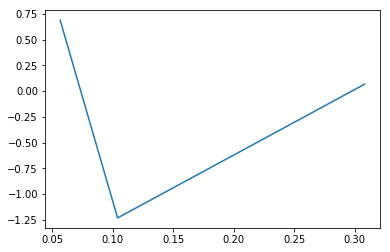

In [11]:
n = 6
arr = np.random.normal(size=(2,3))
print(np.mean(arr,0))
print(np.var(arr, 0))
plt.plot(np.var(arr,0), np.mean(arr,0))
plt.show()

2.

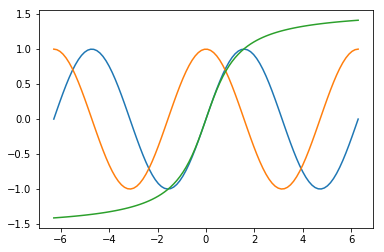

In [13]:
x = np.linspace(-2*np.pi,2*np.pi,100);
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.arctan(x)
plt.plot(x, y1, x, y2, x, y3)
plt.show()

3.

C:\Users\jfan3\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


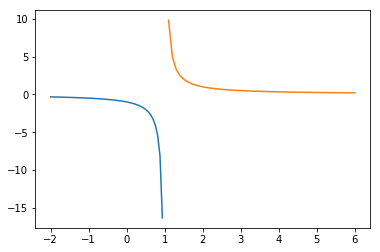

In [14]:
x_1 = np.linspace(-2,1)
x_2 = np.linspace(1,6)
def f(x):
    return (1/(x-1))
f1=f(x_1)
f2=f(x_2)
plt.plot(x_1, f1, x_2, f2)
plt.show()

4.

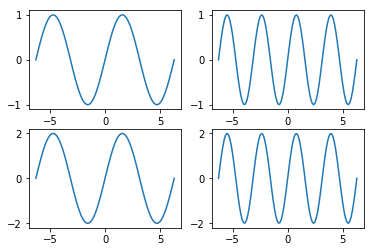

In [15]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.sin(2*x)
y3 = 2*np.sin(x)
y4 = 2*np.sin(2*x)

ax1 = plt.subplot(2,2,1)
ax1.plot(x, y1)
ax2 = plt.subplot(2,2,2)
ax2.plot(x, y2)
ax3 = plt.subplot(2,2,3)
ax3.plot(x, y3)
ax4 = plt.subplot(2,2,4)
ax4.plot(x, y4)

plt.show()

5.

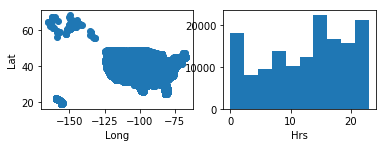

In [17]:
def prob_1_5():
    dta = np.load("FARS.npy")
    ax1 = plt.subplot(2,2,1)
    ax1.scatter(dta[:,1], dta[:,2])
    ax1.set_xlabel("Long")
    ax1.set_ylabel("Lat")
    ax2 = plt.subplot(2,2,2)
    ax2.hist(dta[:,0])
    ax2.set_xlabel("Hrs")
    plt.show()
prob_1_5()

6.

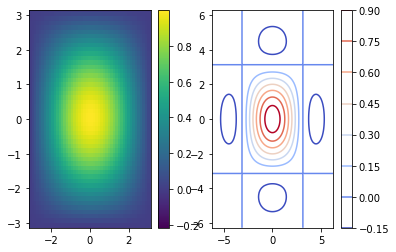

In [18]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = x.copy()
X, Y = np.meshgrid(x, y)

def g(x,y):
    num = np.sin(x)*np.sin(y)
    denom = x*y
    return num/denom

Z = g(X,Y)

plt.subplot(121)
plt.pcolormesh(X, Y, Z, cmap="viridis")
plt.colorbar()
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

plt.subplot(122)
plt.contour(X, Y, Z, 10, cmap="coolwarm")
plt.colorbar()
plt.show()

### Data Visualization
1.

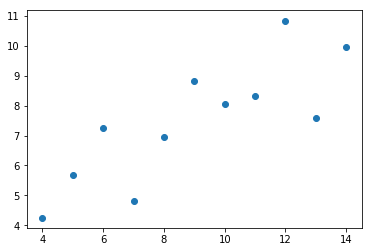

In [19]:
dta = np.load("anscombe.npy")
plt.scatter(dta[:,0], dta[:,1])
plt.show()

In [23]:
from scipy import stats
stats.linregress(dta[:,0],dta[:,1])


LinregressResult(slope=0.5000909090909091, intercept=3.0000909090909103, rvalue=0.8164205163448399, pvalue=0.00216962887307879, stderr=0.11790550059563408)

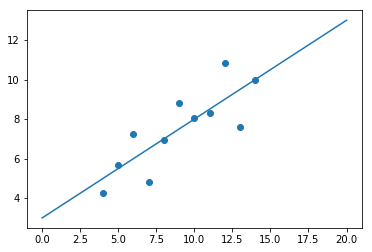

In [24]:
plt.scatter(dta[:,0], dta[:,1])
x = np.linspace(0,20)
y = 3+0.5*x
plt.plot(x,y)
plt.show()

In [22]:
print(np.mean(dta[:,0]), np.mean(dta[:,1]), np.var(dta[:,0]), np.var(dta[:,1]))

9.0 7.500909090909093 10.0 3.7520628099173554


2.

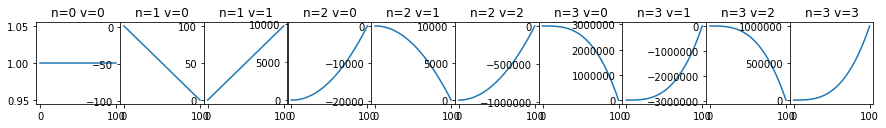

In [30]:
from scipy import special

fig, axs = plt.subplots(1,10, figsize=(15,1.5))
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

x = np.linspace(0,100,200)
def b(x):
    i = 0
    for n in range(0,4):
        for v in range(0,n+1):
            y = special.binom(n, v)*(x**v)*(1-x)**(n-v)
            axs[i].plot(x,y)
            ttl = "n="+str(n)+" v="+str(v)
            axs[i].set_title(ttl)
            i+=1
b(x)
plt.show()

3.

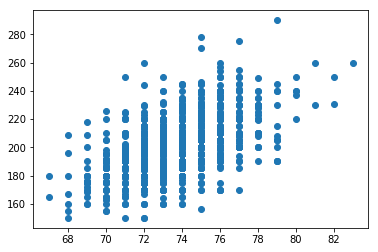

In [31]:
dta = np.load("MLB.npy")
plt.scatter(dta[:,0], dta[:,1])
plt.show()

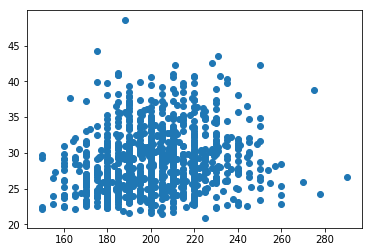

In [32]:
plt.scatter(dta[:,1], dta[:,2])
plt.show()

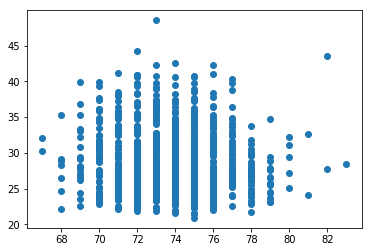

In [33]:
plt.scatter(dta[:,0], dta[:,2])
plt.show()

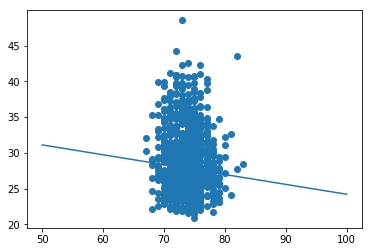

In [34]:
plt.scatter(dta[:,0], dta[:,2])
stats.linregress(dta[:,0], dta[:,2])
x=np.linspace(50,100)
y = 38+(-0.138)*x
plt.plot(x,y)
plt.show()

4. 

1). how many earthquakes happen per year?

In [35]:
year, magnitude, longitude, latitude = np.load("earthquakes.npy").T

In [39]:
from itertools import groupby
year = [int(x) for x in year]
nums = [len(list(group)) for key, group in groupby(year)]
np.mean(nums)

1706.5

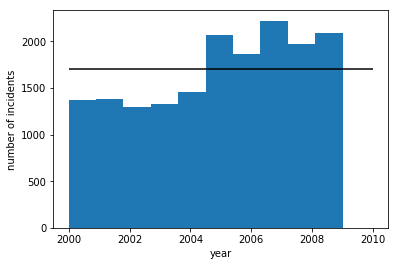

In [42]:
plt.hist(year)
plt.hlines(1706.5,2000,2010)
plt.xlabel("year")
plt.ylabel("number of incidents")
plt.show()

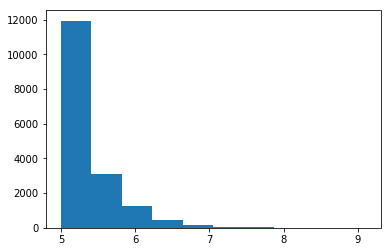

In [41]:
plt.hist(magnitude)
plt.show()

### Pandas 1

### Pandas 2

### Pandas 3

### Pandas 4
1.

In [68]:
DJIA=pd.read_csv("DJIA.csv")
DJIA.describe()


,DATE,VALUE
count,2609,2609
unique,2609,2505
top,2009-08-04,.
freq,1,92


In [71]:
DJIA=pd.read_csv("DJIA.csv")

# DJIA['DATE']=DJIA[['DATE']].applymap(lambda x: datetime.strptime(x,"%Y-%m-%d"))
# date_index=pd.to_datetime(DJIA['DATE'], format="%m/%d, %Y")
DJIA.set_index(pd.DatetimeIndex(DJIA['DATE']),inplace=True)
DJIA.drop(['DATE'],axis=1,inplace=True)
DJIA.dropna(axis=0,inplace=True)
DJIA=DJIA[DJIA.VALUE!="."]
DJIA.VALUE=pd.to_numeric(DJIA['VALUE'])


In [73]:
DJIA.dtypes

VALUE    float64
dtype: object

Text(0.5,1,'Dow Jones Industrial Average from 2006–2016')

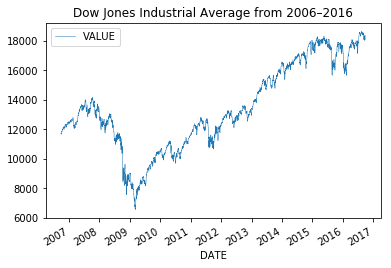

In [76]:
DJIA.plot(lw=0.5)
plt.title("Dow Jones Industrial Average from 2006–2016")

2.

In [92]:
pc=pd.read_csv("paychecks.csv",header=None)
pc.head()
pc.columns=["paycheck"]
dt1=pd.date_range('3/13/2008',freq="WOM-3FRI",periods=len(pc)).union(pd.date_range('3/13/2008',freq="WOM-1FRI",periods=len(pc)))
pc.set_index(dt1[:len(pc)],inplace=True)
pc.head()

,paycheck
2008-03-21,1122.26
2008-04-04,921.03
2008-04-18,962.46
2008-05-02,1035.97
2008-05-16,1078.59


3.

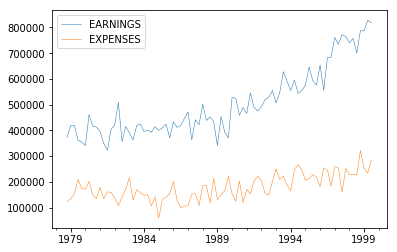

In [105]:
fi = pd.read_csv("finances.csv")
fi.head()
p = pd.period_range("1978-09", periods=len(fi),freq="Q-SEP")
fi.set_index(p,inplace=True)
fi.plot(lw=0.5)

4.

             IP                         ENTER                         LEAVE  \
duration                                                                      
00:00:10  14235 1970-01-01 00:00:00.000014235 1970-01-01 00:00:00.000014235   

                duration  
duration                  
00:00:10 00:00:00.000014  


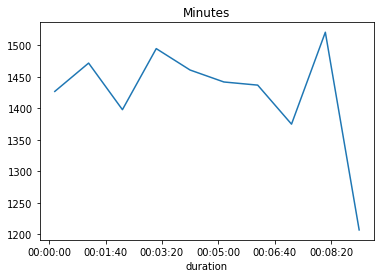

In [235]:
web = pd.read_csv("website_traffic.csv")
web.head()

web['ENTER']=pd.to_datetime(web['ENTER'],format="%Y-%m-%d %H:%M:%S")
web['LEAVE']=pd.to_datetime(web['LEAVE'],format="%Y-%m-%d %H:%M:%S")
web['duration']=web.LEAVE-web.ENTER
web.set_index(web['duration'],inplace=True)
# web.duration=web[['duration']].applymap(lambda x: pd.TimedeltaIndex(int(x.total_seconds())))

# web.duration.total_seconds()
# print(web.head())

minute=web.resample("T")
minute.duration.agg(len).plot()
plt.title("Minutes")
hour=web.resample("H")
print(hour.agg(len))
# pd.to_datetime(hour.index, format="%H:%M")
# hour.reindex(pd.to_datetime(hour.index, format="%H:%M"))
# hour.duration.agg(len).plot()

In [200]:
print(f"single day with highest gain is {DJIA.VALUE.idxmax().strftime('%m/%d/%Y')}")
print(f"single day with lowest gain is {DJIA.VALUE.idxmin().strftime('%m/%d/%Y')}")
new=DJIA.resample("M")
temp = new.sum()
# print(temp)
print(f"single month with highest gain is {temp.VALUE.idxmax().strftime('%m/%Y')}")
print(f"single month with lowest gain is {temp.VALUE.idxmin().strftime('%m/%Y')}")

single day with highest gain is 08/15/2016
single day with lowest gain is 03/09/2009
single month with highest gain is 08/2016
single month with lowest gain is 09/2006


5.

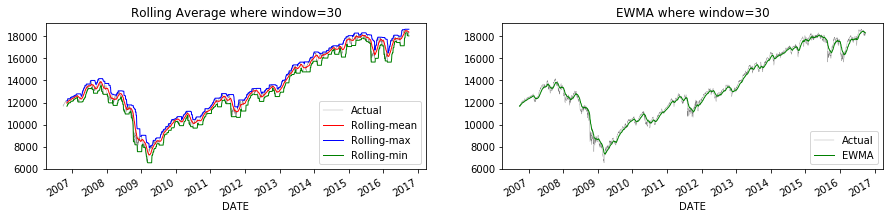

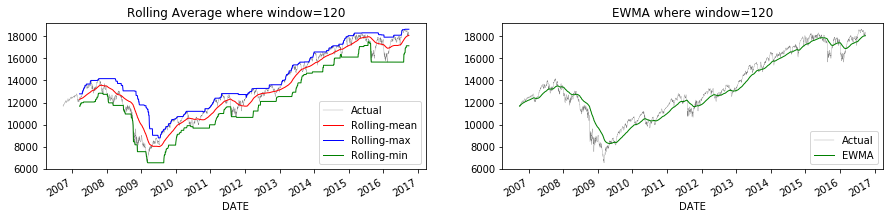

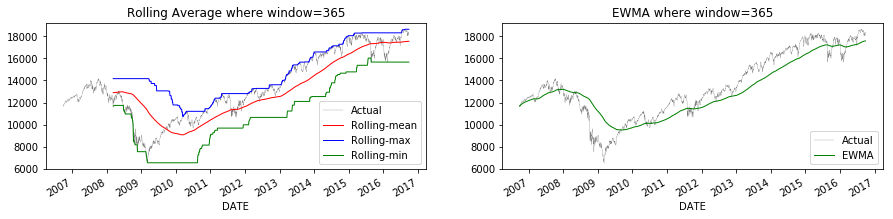

In [237]:


for t in [30, 120, 365]:

    # Plot the original data together with a rolling average.
    f, axs = plt.subplots(1,2,figsize=(15,3))
    ax1,ax2=axs
    # ax1 = plt.subplot(121)
    DJIA.plot(color="gray", lw=.3, ax=ax1)
    DJIA.rolling(window=t).mean().plot(color='r', lw=1, ax=ax1)
    DJIA.rolling(window=t).max().plot(color='b', lw=1, ax=ax1)
    DJIA.rolling(window=t).min().plot(color='g', lw=1, ax=ax1)
    ax1.legend(["Actual", "Rolling-mean", "Rolling-max", "Rolling-min"], loc="lower right")
    ax1.set_title(f"Rolling Average where window={t}")
    # ax2 = plt.subplot(122)
    
    DJIA.plot(color="gray", lw=.3, ax=ax2)
    DJIA.ewm(span=t).mean().plot(color='g', lw=1, ax=ax2)
    ax2.legend(["Actual", "EWMA"], loc="lower right")
    ax2.set_title(f"EWMA where window={t}")